# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logistica: Lección 6 - Randon Forest**
--

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np
# from tqdm import tqdm

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# =====================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming:


Ajustad un modelo de Random Forest a nuestros datos.

- Calculad las métricas a nuestro nuevo modelo.
  
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [2]:
# abrimos el dataset
df = pd.read_pickle("datos/invistico_airline_encoding.pkl")
# para poder ejecutarlo hacemos un sample de 65000 registros
df_sample = df.sample(65000)

In [3]:
# separamos los datos en variable respuesta (y) y predictoras (X)
X1 = df_sample.drop("satisfaction", axis = 1)
y1 = df_sample["satisfaction"]

In [4]:
# separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Como esta basado en el Decision Tree, usaremos los hiperparámetros que seleccionamos en la lección anterior 

In [5]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [4, 6, 10, 12, 14], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [2,3,4,5],# Ponemos como límite el 5 ya que es el resultado de la raiz cuadrada era 4,58. 
        "min_samples_split": [ 100, 1000, 30000],
        "min_samples_leaf": [ 100, 1000, 30000]} 

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation
            verbose=-1) # para que no printee ningún mensaje en pantalla
        

In [7]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 10, 12, 14],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [100, 1000, 30000],
                         'min_samples_split': [100, 1000, 30000]},
             verbose=-1)

In [8]:
# saquemos ahora cual es nuestro mejor bosque
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=12, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

In [9]:
# dibujemos los árboles de nuestro bosque

#for arbol in tqdm(bosque.estimators_):
#   fig = plt.figure(figsize=(20, 10))
#   tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
#   plt.show()

In [10]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
df_RF_results = spf.metricas_rlog(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
df_RF_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.915462,0.915041,0.931671,0.923281,0.829165,test,Random Forest
1,0.919288,0.920078,0.933743,0.926860,0.836839,train,Random Forest


In [12]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_RF_results.to_csv("datos/resultados_satisfaction_RF.csv")


In [13]:
df_RF_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.915462,0.915041,0.931671,0.923281,0.829165,test,Random Forest
1,0.919288,0.920078,0.933743,0.926860,0.836839,train,Random Forest


In [14]:
df_DT_results = pd.read_csv("datos/resultados_satisfaction_DT.csv", index_col= 0)
df_DT_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
6,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
7,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II


In [15]:
df_results_final = pd.concat([df_DT_results, df_RF_results], axis = 0).reset_index(drop=True)
df_results_final

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
4,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
5,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II
6,0.915462,0.915041,0.931671,0.923281,0.829165,test,Random Forest
7,0.919288,0.920078,0.933743,0.926860,0.836839,train,Random Forest


In [16]:
df_results_final.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.846206,0.840229,0.850888,0.845525,0.692419,test,Regresión Logística Balanceado
1,0.845522,0.844885,0.847454,0.846168,0.691040,train,Regresión Logística Balanceado
2,0.926817,0.942984,0.922873,0.932820,0.852477,test,Decission tree II
3,0.934257,0.949163,0.929490,0.939223,0.867646,train,Decission tree II
4,0.927496,0.941035,0.910475,0.925503,0.854925,test,Decission tree Balanceado II
5,0.939704,0.954024,0.924272,0.938912,0.879418,train,Decission tree Balanceado II
6,0.915462,0.915041,0.931671,0.923281,0.829165,test,Random Forest
7,0.919288,0.920078,0.933743,0.926860,0.836839,train,Random Forest


In [17]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,inflight_entertainment,0.217214
4,seat_comfort,0.189479
11,ease_of_online_booking,0.150847
1,customer_type,0.075032
17,online_boarding,0.048741
3,class,0.047866
0,gender,0.044044
2,type_of_travel,0.034975
10,online_support,0.031285
6,food_and_drink,0.030539


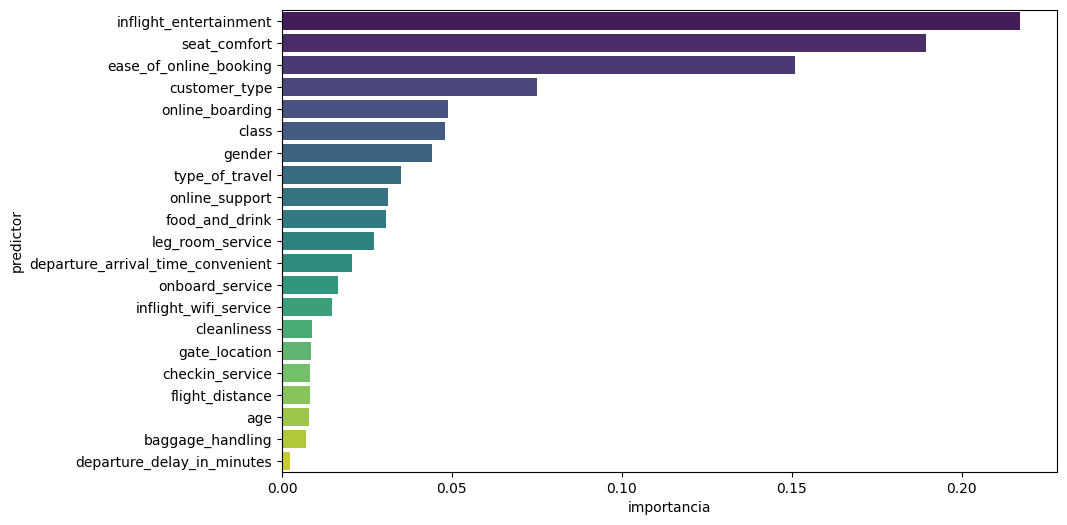

In [18]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()